In [75]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np 
import missingno 


In [76]:
# Chargement du jeu de données
df = pd.read_csv('kc_house_data_entrainement.csv', encoding='utf-8')
df_double=df

In [77]:
df["zipcode"]=df["zipcode"].astype("str")
df["zipcode"]

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 21613, dtype: object

In [78]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

price / bedrooms


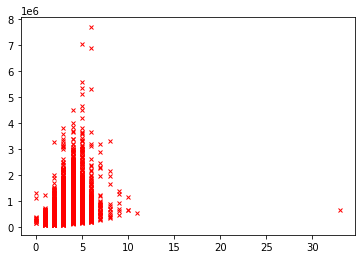

price / bathrooms


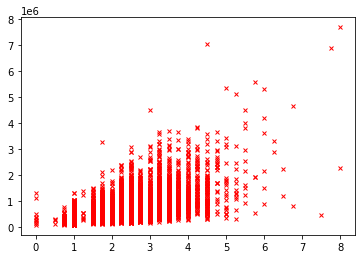

price / sqft_living


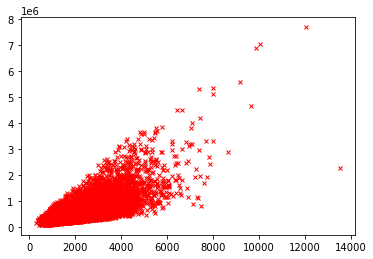

price / view


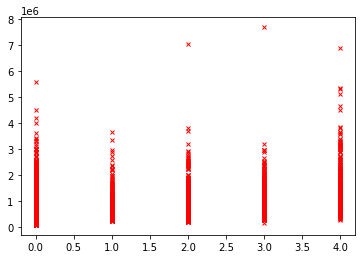

price / grade


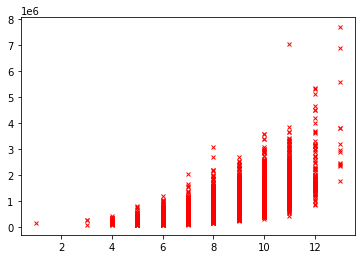

price / sqft_above


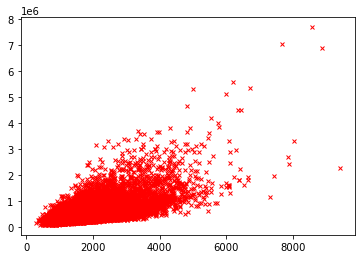

price / sqft_living15


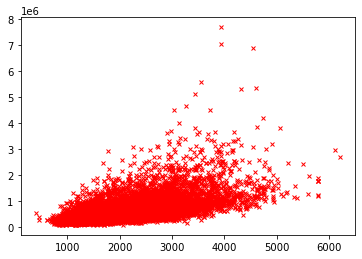

In [79]:
for index in df:
    if index in ["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view", "bedrooms"]:
        print("price / " + index)
        plt.plot(df[index], df['price'], 'rx', markersize=4)
        plt.show()

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

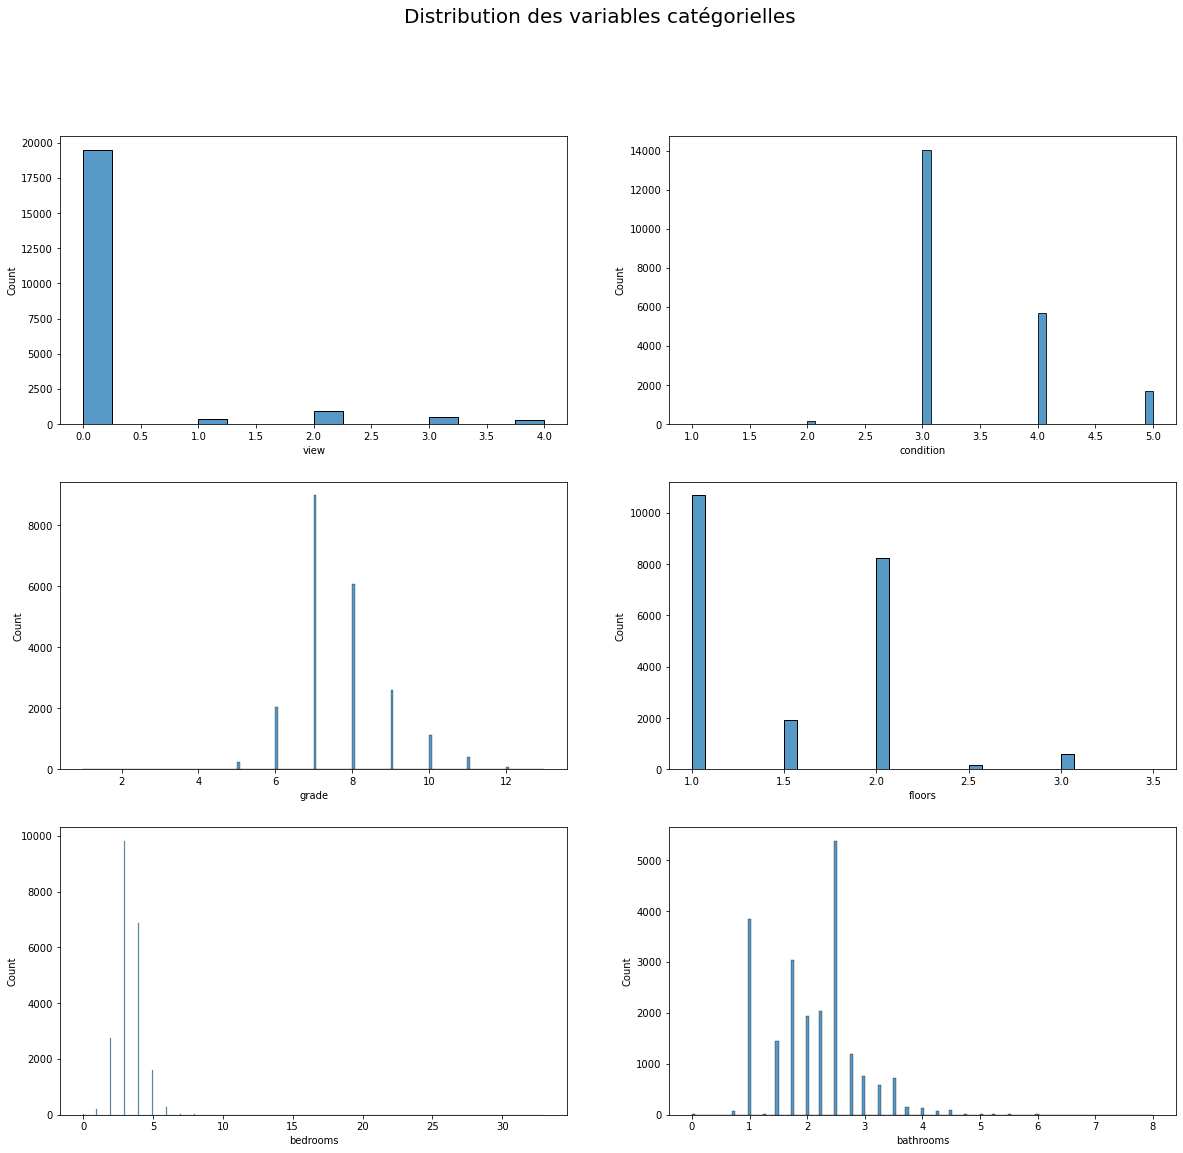

In [80]:
fig, ax = plt.subplots(3,2,figsize=(20,18))
plt.suptitle('Distribution des variables catégorielles',fontsize=20)
sns.histplot(ax=ax[0,0],x='view',data=df)
sns.histplot(ax=ax[0,1],x='condition',data=df)
sns.histplot(ax=ax[1,0],x='grade',data=df)
sns.histplot(ax=ax[1,1],x='floors',data=df)
sns.histplot(ax=ax[2,0],x='bedrooms',data=df)
sns.histplot(ax=ax[2,1],x='bathrooms',data=df)

In [81]:
#méthode pour remplacer les données érronées en valeur manquantes
df['price'] = pd.to_numeric(df['price'], errors='coerce')
#méthode pour modifier les valeurs manquantes d'une collones en moyennes pour modifier la méthode de machine learning
df.loc[df['price'].isnull(), 'price'] = df['price'].mean()
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [82]:
#pour étudier la corrélation entre les données
df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406


In [83]:
#pour potentiellement supprimer une colonne en fonction de la correlation avec le prix
#ici on va prendre correlation des données positives
df.drop(["id", "zipcode"], axis=1, inplace=True)
df


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [84]:
#pour potentiellement supprimer une colonne en fonction de la correlation avec le prix
#ici on va prendre correlation des données à 0.7 min
df.drop(["bathrooms", "bedrooms"], axis=1, inplace=True)
df.drop(["floors", "waterfront"], axis=1, inplace=True)
df.drop(["view", "condition"], axis=1, inplace=True)
df.drop(["grade", "sqft_above"], axis=1, inplace=True)
df.drop(["sqft_basement", "yr_built"], axis=1, inplace=True)
df.drop(["yr_renovated", "lat"], axis=1, inplace=True)
df.drop(["long", "sqft_living15"], axis=1, inplace=True)
df.drop(["date"], axis=1, inplace=True)
df


,price,sqft_living,sqft_lot,sqft_lot15
0,221900.0,1180,5650,5650
1,538000.0,2570,7242,7639
2,180000.0,770,10000,8062
3,604000.0,1960,5000,5000
4,510000.0,1680,8080,7503
...,...,...,...,...
21608,360000.0,1530,1131,1509
21609,400000.0,2310,5813,7200
21610,402101.0,1020,1350,2007
21611,400000.0,1600,2388,1287


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split




x = df.drop("price", axis=1, inplace=False)
y = df["price"]


xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

linreg = LinearRegression()
linreg.fit(xtrain, ytrain)

ypred_train = linreg.predict(xtrain)
ypred_test = linreg.predict(xtest)



linreg.fit(xtrain, ytrain)
print(linreg.score(xtrain, ytrain))
#avec changement sur la base de données

0.4970762450476981


In [86]:
x

,sqft_living,sqft_lot,sqft_lot15
0,1180,5650,5650
1,2570,7242,7639
2,770,10000,8062
3,1960,5000,5000
4,1680,8080,7503
...,...,...,...
21608,1530,1131,1509
21609,2310,5813,7200
21610,1020,1350,2007
21611,1600,2388,1287


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



x = df_double.drop("price", axis=1, inplace=False)
y = df_double["price"]


xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

linreg = LinearRegression()
linreg.fit(xtrain, ytrain)

ypred_train = linreg.predict(xtrain)
ypred_test = linreg.predict(xtest)

#sans changement sur la base de données


linreg.fit(xtrain, ytrain)
print(linreg.score(xtrain, ytrain))

0.49431576907339736


In [88]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler ,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
x_double = df_double.drop("price", axis=1, inplace=False)
y_double = df_double["price"]

xtrain, xtest, ytrain, ytest = train_test_split(x_double, y_double, test_size=0.1)
num_col =list(x_double.select_dtypes(include=(float,int)))
cat_col=list(x_double.select_dtypes(include=(object)))




my_col_trans =ColumnTransformer([
    ("one_hot",OneHotEncoder(),cat_col),
    ("scaling",StandardScaler(),num_col)
])

my_pipe=make_pipeline(my_col_trans,LinearRegression())
my_pipe.fit(xtrain,ytrain)
my_pipe.predict(xtest)
grid=GridSearchCV

In [89]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [90]:
X = df.drop('price', axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

In [91]:
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())

In [92]:
my_pipe_lasso = make_pipeline(preprocessing, Lasso())

In [93]:
my_pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  []),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_lot15'])])),
                ('lasso', Lasso())])

In [94]:
my_pipe_lasso.score(X_test, y_test)

0.5890481902978462

In [95]:
y_pred = my_pipe_lasso.predict(X_train)

In [96]:
residual = (y_train - y_pred).abs().sort_values()

In [97]:
to_drop = residual[residual > 500000].index

In [98]:
df_cleaned = df.drop(to_drop)

In [99]:
df_cleaned

,price,sqft_living,sqft_lot,sqft_lot15
0,221900.0,1180,5650,5650
1,538000.0,2570,7242,7639
2,180000.0,770,10000,8062
3,604000.0,1960,5000,5000
4,510000.0,1680,8080,7503
...,...,...,...,...
21608,360000.0,1530,1131,1509
21609,400000.0,2310,5813,7200
21610,402101.0,1020,1350,2007
21611,400000.0,1600,2388,1287


/home/sahboun/miniconda3/envs/osp/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


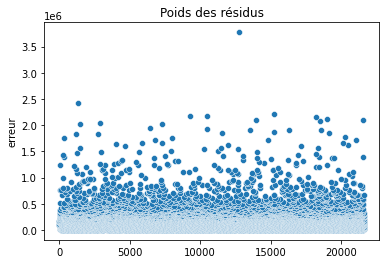

In [100]:
sns.scatterplot(residual.index, residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [101]:
X = df_cleaned.drop('price', axis=1)
y = df_cleaned.price
X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

In [102]:
my_pipe_lasso = make_pipeline(preprocessing, Lasso())
my_pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  []),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_lot15'])])),
                ('lasso', Lasso())])

In [103]:
my_pipe_lasso.score(X_test, y_test)

0.5618839102253754

In [104]:
param={"lasso__alpha":np.linspace(0,1,50)}
#dans mon pipe lasso lasso, prendre les valeur tous les 50 pas
param

{'lasso__alpha': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
        0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
        0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])}

/home/sahboun/miniconda3/envs/osp/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

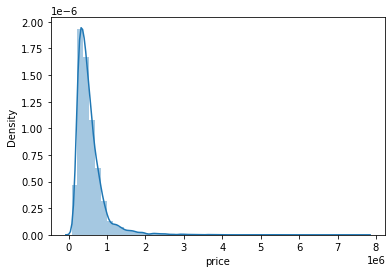

In [105]:
sns.distplot(df['price'])


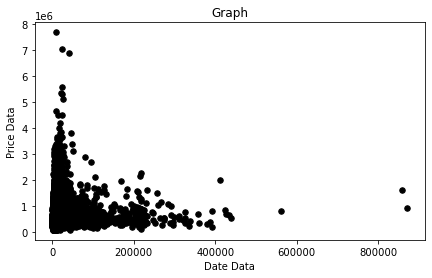

In [106]:


plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Date Data')
plt.ylabel('Price Data')

plt.scatter(df['sqft_lot15'],df['price'],s=30,alpha=1,color= 'k')

